In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
raiz = r"C:\Users\cegom\Downloads"

In [5]:
market = pd.read_excel(f"{raiz}/acciones.xlsx", index_col=0)

In [143]:
mejores = (market.pct_change().dropna(axis = 0).mean() * 252).sort_values(ascending = False).head(7)

Index(['ELEKTRA* MF Equity', 'OMAB MF Equity', 'BOLSAA MF Equity',
       'WALMEX* MF Equity', 'GAPB MF Equity', 'GCC* MF Equity',
       'GMEXICOB MF Equity'],
      dtype='object')

In [149]:
acciones = pd.concat([market[list(mejores.index)],market.iloc[:,-1]], axis = 1)
rets = acciones.pct_change().dropna(axis = 0)
rets.head()

,ELEKTRA* MF Equity,OMAB MF Equity,BOLSAA MF Equity,WALMEX* MF Equity,GAPB MF Equity,GCC* MF Equity,GMEXICOB MF Equity,MEXBOL INDEX
DATE,,,,,,,,
2016-01-04,-0.028018,-0.022007,-0.012686,-0.014946,-0.022887,-0.029011,-0.029356,-0.020099
2016-01-05,-0.030183,-0.002324,0.000000,-0.004202,-0.004308,0.000000,0.020722,-0.001710
2016-01-06,-0.040974,0.005516,-0.003988,-0.006564,-0.006354,0.000000,-0.024143,-0.008337
2016-01-07,-0.024835,-0.013288,-0.024021,-0.056395,-0.038574,-0.017237,-0.015744,-0.024696
2016-01-08,-0.013617,-0.016185,-0.017320,0.026007,0.017124,0.000000,-0.024279,-0.009744


In [200]:
#1.
rend_diario = rets.iloc[:,:7].mean()
rend_anual = rets.iloc[:,:7].mean() * 252

print("Rendimiento promedio constante \n")
print(f"Rendimiento Diario:\n\n{rend_diario.apply(lambda x: f'{x * 100:0.2f}%')} \n\nRendimiento Anual: \n\n{rend_anual.apply(lambda x: f'{x * 100:0.2f}%')}")

Rendimiento promedio constante 

Rendimiento Diario:

ELEKTRA* MF Equity    0.15%
OMAB MF Equity        0.06%
BOLSAA MF Equity      0.07%
WALMEX* MF Equity     0.03%
GAPB MF Equity        0.05%
GCC* MF Equity        0.09%
GMEXICOB MF Equity    0.05%
dtype: object 

Rendimiento Anual: 

ELEKTRA* MF Equity    36.68%
OMAB MF Equity        15.89%
BOLSAA MF Equity      18.12%
WALMEX* MF Equity      8.24%
GAPB MF Equity        12.78%
GCC* MF Equity        22.31%
GMEXICOB MF Equity    13.38%
dtype: object


In [202]:
Phi = rets.iloc[:, :-1].values
t = rets.iloc[:, [-1]]
N, M = Phi.shape

I = np.concatenate([np.identity(M)] * 2, axis=1)
I = np.concatenate([I] * 2, axis=0)

In [203]:
P = np.ones((N, M))
P = np.c_[P, Phi]

In [220]:
#1a
W = np.linalg.inv((P.T @ P) * I) @ P.T @ t
W["security"]  = np.concatenate([rets.columns[:-1]] * 2)
W["param"] = ["alpha"] * M + ["beta"] * M
B = W.pivot_table(index="security", columns="param", values="MEXBOL INDEX")
betas = B[["beta"]].copy()
betas

param,beta
security,
BOLSAA MF Equity,0.152271
ELEKTRA* MF Equity,0.062163
GAPB MF Equity,0.282531
GCC* MF Equity,0.110661
GMEXICOB MF Equity,0.244111
OMAB MF Equity,0.259061
WALMEX* MF Equity,0.291118


In [221]:
betas["rendimiento_CAPM"] = 0.05 + betas * 0.1
betas

param,beta,rendimiento_CAPM
security,,
BOLSAA MF Equity,0.152271,0.065227
ELEKTRA* MF Equity,0.062163,0.056216
GAPB MF Equity,0.282531,0.078253
GCC* MF Equity,0.110661,0.061066
GMEXICOB MF Equity,0.244111,0.074411
OMAB MF Equity,0.259061,0.075906
WALMEX* MF Equity,0.291118,0.079112


In [154]:
#1b
#Dado que todas las betas son menores que 1, se considera son acciones defensivas

In [155]:
#2.
rend = rets.iloc[:,:7]
mat_cov = rend.cov()
mat_cov

,ELEKTRA* MF Equity,OMAB MF Equity,BOLSAA MF Equity,WALMEX* MF Equity,GAPB MF Equity,GCC* MF Equity,GMEXICOB MF Equity
ELEKTRA* MF Equity,4.283130e-04,0.000026,0.000010,0.000028,0.000017,0.000005,-7.371033e-07
OMAB MF Equity,2.585833e-05,0.000253,0.000045,0.000051,0.000131,0.000025,6.281504e-05
BOLSAA MF Equity,9.889090e-06,0.000045,0.000278,0.000023,0.000043,0.000022,4.450066e-05
WALMEX* MF Equity,2.820605e-05,0.000051,0.000023,0.000215,0.000046,0.000017,4.870073e-05
GAPB MF Equity,1.683988e-05,0.000131,0.000043,0.000046,0.000233,0.000023,6.983020e-05
GCC* MF Equity,5.209483e-06,0.000025,0.000022,0.000017,0.000023,0.000242,3.033839e-05
GMEXICOB MF Equity,-7.371033e-07,0.000063,0.000045,0.000049,0.000070,0.000030,3.251424e-04


In [156]:
#3.
def port_rend(weights, r):
    E_p = (r.mean() @ weights) * 252
    return E_p

def port_vol(weights, r):
    S_p = np.sqrt(weights.T @ (r.cov() * 252) @ weights)
    return S_p

In [ ]:
np.random.seed(150)

num = np.random.random(7)
weights = num/num.sum()

In [157]:
N, M = rets.shape
w0  = weights

def sum_weights(weights):
    return weights.sum() - 1 # == 0

constraints = [
    {"type": "eq", "fun": sum_weights}
]

port0 = minimize(port_vol, w0, constraints=constraints, args=rend)
port0

     fun: 0.1307910593095695
     jac: array([0.13098718, 0.13060569, 0.13045429, 0.13108908, 0.13089789,
       0.13066944, 0.13076373])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.13000058, 0.08024519, 0.15833768, 0.19858484, 0.11854872,
       0.21797256, 0.09631043])

In [158]:
print(f"Portafolio de mínima varianza: {port0.x}")
wp0 = port0.x
port_rend(wp0, rend), port_vol(wp0, rend)

Portafolio de mínima varianza: [0.13000058 0.08024519 0.15833768 0.19858484 0.11854872 0.21797256
 0.09631043]


(0.18216534912432752, 0.1307910593095695)

In [212]:
r_min = port_rend(wp0, rend)
r_max = r_min + .2

rend_max = np.linspace(r_min, r_max)

In [214]:
pesos_optimos = []

def rend_esperado(w, E):
    return port_rend(w, rend) - E

for e in rend_max:
    constraints = [
        {"type": "eq", "fun": sum_weights},
        {"type": "eq", "fun": lambda w: rend_esperado(w, e)}
    ]

    port1 = minimize(port_vol, w0, constraints=constraints, args=rend)
    w_opt = port1.x
    pesos_optimos.append(w_opt)

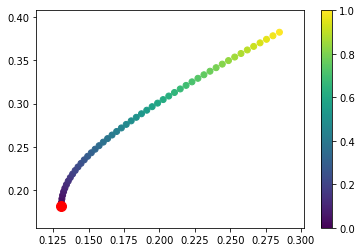

In [215]:
r_opt = []
v_opt = []
for w in pesos_optimos:
    r_opt.append(port_rend(w, rend))
    v_opt.append(port_vol(w, rend))

r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.scatter(v_opt, r_opt, c = r_opt)
plt.scatter(port_vol(wp0, rend), port_rend(wp0, rend), c = "red",s = 100)
plt.colorbar()

In [162]:
#4.

rf = 0.05

def min_func_sharpe(weights):
    return - (port_rend(weights, rend) - rf) / port_vol(weights, rend) 

constraints = [
    {"type": "eq", "fun": sum_weights}
]

f_sharpe = minimize(min_func_sharpe, w0, constraints=constraints)

In [163]:
f_sharpe

     fun: -1.283282490624961
     jac: array([-0.30047536, -0.30161139, -0.30102952, -0.30210179, -0.30153926,
       -0.30154575, -0.30148368])
 message: 'Optimization terminated successfully.'
    nfev: 102
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([ 0.36877863,  0.11065721,  0.17851008, -0.05926022,  0.01080761,
        0.32713177,  0.06337493])

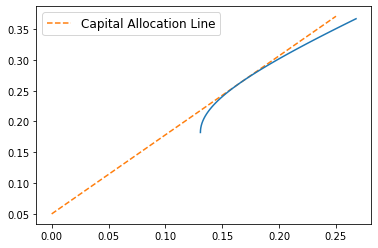

In [165]:
e_sharpe = port_rend(w_sharpe, rend)
vol_sharpe = port_vol(w_sharpe, rend)

sigma_c =  np.linspace(0, 0.25)
sharpe = rf + sigma_c * (e_sharpe - rf) / vol_sharpe

plt.plot(sigma_c, sharpe, linestyle="--", c="tab:orange", label="Capital Allocation Line")
plt.plot(v_opt, r_opt)
plt.legend(fontsize=12)

In [237]:
w_sharpe = f_sharpe.x
w_sharpe

array([ 0.36877863,  0.11065721,  0.17851008, -0.05926022,  0.01080761,
        0.32713177,  0.06337493])

In [240]:
#5.
# Sea la funcion de utilidad u = E[Rc] - 1/2 A sigma**2
A = 3
y_estrella = (w_sharpe * betas.rendimiento_CAPM).sum() / (A * vol_sharpe ** 2)
y_estrella

0.8611722901988215

In [242]:
print(f"Se invertira: {y_estrella * 100: 0.2f}% en activos riesgosos\nSe invertira: {(1 - y_estrella) * 100: 0.2f}% en activos no riesgosos")

Se invertira:  86.12% en activos riesgosos
Se invertira:  13.88% en activos no riesgosos


In [181]:
#6.
# Cuando hay una gran gran gran cantidad de observaciones y variables, y un modelo de ML convencional no es suficiente.

In [182]:
#7.
# Cuando un modelo más sencillo de un resultado satisfactorio para el ejercicio. Ej una regresión.

In [183]:
#8.
# Función sigmoidal, tanh(x) y RELU(x).

In [184]:
#9.
# Método para evaluar la contribución de cada capa de una red neuronal al error del output. Una vez que se tiene la salida de
# El resultado se compara con el resultado deseado y se calcula el error hacia atrás. Se evalua la derivada de la función
# de costos expresada como el producto de las derivadas entre cada capa.

In [185]:
#10.
# Las redes feed fwd solo se mueven en una dirección por lo que pierden información si está existe en más de una. Las
# redes convolucionales pueden ser más eficientes ya que captan información "local".